# 21회 기출문제 풀이 (1) 

## 머신 러닝 (50점)
학생 성적에 관한 데이터세트 제공 394행짜리 소규모 데이터.

1-1. 시각화 포함 탐색적 자료분석(EDA) <br>
1-2. 결측치 식별하고 결측치를 예측하는 두 가지 방법 정도를 쓰고, 선택한 이유를 설명.<br>
1-3. 범주형 변수 인코딩이 필요한 경우를 식별하고, 변환을 적용하시오. 선택한 이유를 설명.<br>


In [42]:
import pandas as pd
import numpy as np 
df = pd.read_csv("C:/adp/data/student_data.csv")
df.tail()

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
390,MS,M,yes,no,5.0,5.0,4.0,4.0,5.0,4.0,11.0,9,9,9
391,MS,M,no,no,2.0,4.0,5.0,3.0,4.0,2.0,3.0,15,14,16
392,MS,M,no,no,5.0,5.0,3.0,3.0,3.0,3.0,3.0,8,10,8
393,MS,M,no,no,4.0,4.0,1.0,3.0,4.0,5.0,0.0,11,11,12
394,MS,M,no,no,3.0,2.0,3.0,3.0,3.0,5.0,5.0,9,8,9


In [43]:
## 종속변수 분포 확인 
import matplotlib.pyplot as plt

df['grade'].value_counts()

9     50
11    40
12    39
10    36
13    34
15    31
8     29
14    28
7     19
6     17
4     15
5     12
16    12
17     9
18     9
2      7
19     4
3      3
1      1
Name: grade, dtype: int64

(array([ 8., 18., 29., 48., 50., 76., 73., 59., 21., 13.]),
 array([ 1. ,  2.8,  4.6,  6.4,  8.2, 10. , 11.8, 13.6, 15.4, 17.2, 19. ]),
 <BarContainer object of 10 artists>)

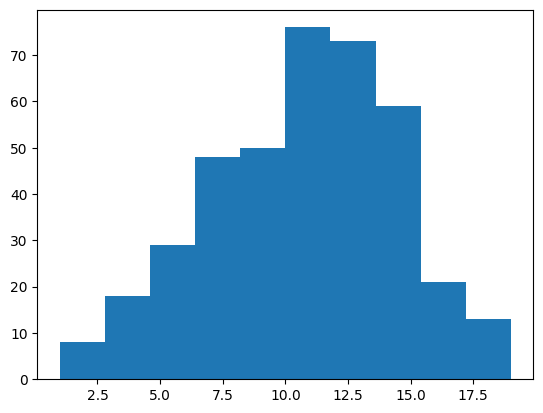

In [44]:
plt.hist('grade', data = df)

In [39]:
# 1. 결측치 존재 여부 : 결측치 변수 기술 및 결측치 처리 필요여부 기술
# 2. 데이터 타입 설명 : object변수 설명 및 인코딩 필요여부 설명
# 3. 종속변수 분포 설명 : 종속변수 분포 설명
# 4. 독립변수 상관관계 설명 : 상관관계 높은 변수 다중공산성 주의 필요
# 5. 종속변수와 독립변수의 상관관계 설명 : 설명력이 높은 변수 존재하여 분석 정확도가 낮지 않을것으로 기대함
# 6. 유의할 점 (pandas_profiling의 warrning 값 설명) 

In [40]:
## 1-2. 결측치 식별하고 결측치를 예측하는 두 가지 방법 정도를 쓰고, 선택한 이유를 설명.
# 1) 단순 대치법 : 수치형 변수라면, 각 컬럼의 평균이나 중앙값을 사용하여 결측치를 보간할 수 있으며, 
#                  명목형, 범주형 변수라면 최빈값을 사용하여 대치할 수 있습니다.              
# 2) KNN을 이용한 결측치 대체 : 보간법 중 결측치가 없는 컬럼들의 최근접 이웃 알고리즘을 통해 결측치가 있는 변수 대체를 할 수 있습니다. 
# * 단, KNN을 이용할 때에는 거리 계산이 가능한 수치형 변수만 사용 가능 
# - 선택 후 장단점 기술하면 됨 (KNN 추천) 
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

df_filled = imputer.fit_transform(df)

pre_df = pd.DataFrame(df_filled,columns=df.columns)

ValueError: could not convert string to float: 'GP'

In [ ]:
## 1-3. 범주형 변수 인코딩이 필요한 경우를 식별하고, 변환을 적용하시오. 선택한 이유를 설명.
# 1) 이산형 변수 : school , sex ,paid,  activities 이 존재, 이산형 변수이므로 boolean 타입으로 변경하여 KNN을 이용한 결측치 처리와 머신러닝에서 변수사용가능하도록 변환하였다. 
# 2) 나머지 변수들은 수치 or 순위형 변수로 판단되므로 원핫인코딩을 하지 않았다. 

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   paid        395 non-null    object 
 3   activities  395 non-null    object 
 4   famrel      394 non-null    float64
 5   freetime    393 non-null    float64
 6   goout       392 non-null    float64
 7   Dalc        391 non-null    float64
 8   Walc        393 non-null    float64
 9   health      391 non-null    float64
 10  absences    392 non-null    float64
 11  grade       395 non-null    int64  
 12  G1          395 non-null    int64  
 13  G2          395 non-null    int64  
dtypes: float64(7), int64(3), object(4)
memory usage: 43.3+ KB


In [5]:
df02 = pd.get_dummies(df, columns = ['school', 'sex', 'paid', 'activities'])
df02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   famrel          394 non-null    float64
 1   freetime        393 non-null    float64
 2   goout           392 non-null    float64
 3   Dalc            391 non-null    float64
 4   Walc            393 non-null    float64
 5   health          391 non-null    float64
 6   absences        392 non-null    float64
 7   grade           395 non-null    int64  
 8   G1              395 non-null    int64  
 9   G2              395 non-null    int64  
 10  school_GP       395 non-null    uint8  
 11  school_MS       395 non-null    uint8  
 12  sex_F           395 non-null    uint8  
 13  sex_M           395 non-null    uint8  
 14  paid_no         395 non-null    uint8  
 15  paid_yes        395 non-null    uint8  
 16  activities_no   395 non-null    uint8  
 17  activities_yes  395 non-null    uin

In [22]:
df02 = df02.astype({'grade':'float64', 'G1':'float64', 'G2':'float64'})
df02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   famrel          394 non-null    float64
 1   freetime        393 non-null    float64
 2   goout           392 non-null    float64
 3   Dalc            391 non-null    float64
 4   Walc            393 non-null    float64
 5   health          391 non-null    float64
 6   absences        392 non-null    float64
 7   grade           395 non-null    float64
 8   G1              395 non-null    float64
 9   G2              395 non-null    float64
 10  school_GP       395 non-null    uint8  
 11  school_MS       395 non-null    uint8  
 12  sex_F           395 non-null    uint8  
 13  sex_M           395 non-null    uint8  
 14  paid_no         395 non-null    uint8  
 15  paid_yes        395 non-null    uint8  
 16  activities_no   395 non-null    uint8  
 17  activities_yes  395 non-null    uin

In [6]:
# 1.4. 데이터 분할 방법을 2가지 쓰고 적절한 데이터 분할을 적용. 선택한 이유 설명.<br>
# 1.5. svm, xgboost, randomforest 3개의 알고리즘 공통점을 쓰고 이 예측 분석에 적합한 알고리즘인지 설명.<br>
# 1.6. 세 가지 모델 모두 모델링 해보고 가장 적합한 알고리즘 선택하고 이유 설명. 한계점 설명하고 보완 가능한 부분 설명. <br>
# 현업에서 사용시 주의할 점 등에 대해 기술.

In [ ]:
## 1.4. 데이터 분할 방법을 2가지 쓰고 적절한 데이터 분할을 적용. 선택한 이유 설명.
# 1) 랜덤 분할 
#  - train test데이터셋을 나누어서 학습된 데이터를 검증할 수 있음 
#  - 분할 시에 무작위로 사용자가 지정하여 비율로 분할 함 
#  - 전체 분석 데이터 중 머신러닝 모델을 학습시키기 위한 학습용 데이터와 테스트 데이터를 나누어서 적용시키는 이유는 
#    모델 결과가 다른 데이터에도 적용 가능한지, 일반화가 가능한지를 검증하기 위함이다. 
# 2) 층화 추출 기법 
# - 종속변수의 클래스의 비율이 학습용 데이터와 테스트용 데이터에 비율이 같게 분할함 
# - 클래스의 편향을 막을 수 있음 
# - 종속변수가 범주형 변수인 분류분석에 사용 

# 해당 데이터는 종속변수가 연속형이므로, 회귀분석을 사용한다. 그러므로 층화추출기법을 사용한 분할이 아닌 랜덤 샘플링을 통한 분할을 사용하여, 7:3 비율로 분할하였다. 

In [31]:
X = df02.drop('grade', axis=1)
y = df02['grade']

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=2022)

In [24]:
## 1.5. svm, xgboost, randomforest 3개의 알고리즘 공통점을 쓰고 이 예측 분석에 적합한 알고리즘인지 설명.

# * 회귀분석과 분류분석을 모두 할 수 있는 분석알고리즘이다. 
# * 모두 범주형 변수를 독립변수로 사용할 수 없어 변환을 해주어야 한다. 
# * 과대 적합 과소적합을 막기위한 매개변수의 설정이 필요하다.

# * 해당 데이터에서는 종속변수의 값이 연속형이므로 회귀분석이 적합하다. 

In [25]:
## 1.6. 세 가지 모델 모두 모델링 해보고 가장 적합한 알고리즘 선택하고 이유 설명. 한계점 설명하고 보완 가능한 부분 설명.
# 현업에서 사용시 주의할 점 등에 대해 기술.

In [32]:
from sklearn.svm import SVR 
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
# SVR은 차원 개념으로 분석하므로 Scaler 필요

In [34]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    { 'C': [0.1, 1,10,100],'gamma': [0.001, 0.01, 0.1, 1, 10]}
]

grid_svm = GridSearchCV(SVR(), param_grid =param_grid, cv = 5)
grid_svm.fit(X_train_scaled, y_train)

# result = pd.DataFrame(grid_svm.cv_results_['params'])
# result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
# result.sort_values(by='mean_test_score', ascending=False)

C:\Users\신주현\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\신주현\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\신주현\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py", line 196, in fit
    accept_large_sparse=False,
  File "C:\Users\신주현\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py", line 581, in _validate_data
    X, y = check_X_y(X, 

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').